**Types of transformation**

**a. Function Transformer:**
1. Log transformation
2. Reciprocal transformation
3. sq/sqrt transformation

**Power Transformers:** (in next videos)
1. Box - Cox transformation
2. Yeo - Johnson transformation

**Use of applying transformation** - transformation converts the distribution (PDF) changes into Normal Distribution

**How to find out if the data is normally distributed or not:**
1. sns.distplot()
2. pd.skew()
3. QQ plot

**We will work with QQ plot here**
y = x plot means Normal Distribued

In [45]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [46]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare','Survived'])

In [47]:
df.sample(3)

,Survived,Age,Fare
684,0,60.0,39.000
788,1,1.0,20.575
611,0,NaN,7.050


In [48]:
df["Age"].fillna(df["Age"].mean(), inplace = True)    # Replacing null values in Age column with its mean

In [49]:
X = df.iloc[:,1:3]  # X = Age and Fare
y = df.iloc[:,0]    # y = Survived

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


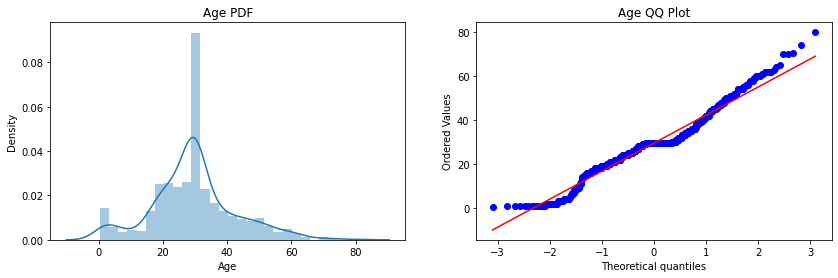

In [51]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title("Age QQ Plot")

plt.show()

# We can see it is close to normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


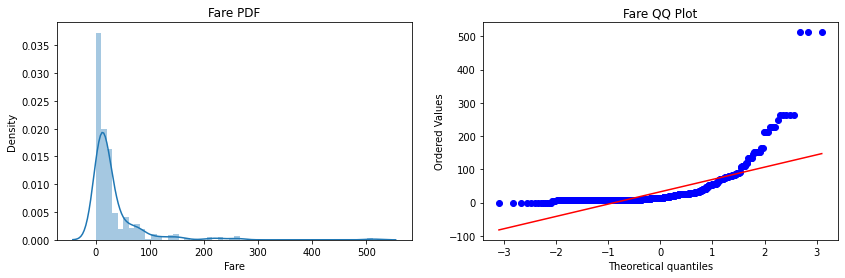

In [52]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title("Fare QQ Plot")

plt.show()

# We can see it is not at all normally distributed. It is right skewed so go for Log Transform

In [53]:
trf = FunctionTransformer(func = np.log1p)    # func = logp would simply apply log and if value is 0 log would fail. Hence we use log1p wherein it adds +1 to the data then takes log

In [54]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed  = trf.fit(X_test)

In [55]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test)
Y_pred1 = clf.predict(X_test)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, Y_pred1))

Accuracy of Logistic Regression:  0.7374301675977654
Accuracy of Decision Tree Classifier:  0.7374301675977654


**Applying Cross Validation**

In [56]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Logistic Regression", np.mean(cross_val_score(clf, X_transformed,y , scoring = 'accuracy',cv=10)))
print("Decision Tree", np.mean(cross_val_score(clf2, X_transformed,y , scoring = 'accuracy',cv=10)))

Logistic Regression 0.678027465667915
Decision Tree 0.658876404494382


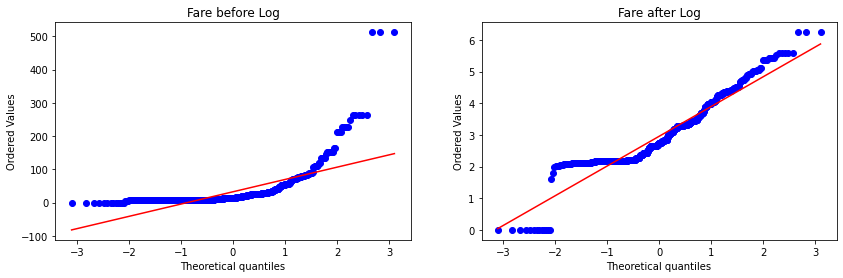

In [58]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title('Fare before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist = 'norm', plot=plt)
plt.title('Fare after Log')

plt.show()

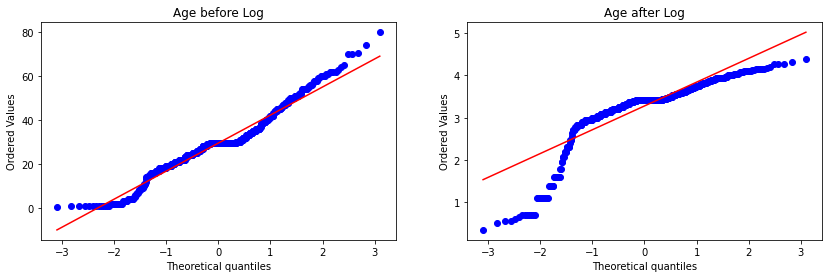

In [59]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title('Age before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist = 'norm', plot=plt)
plt.title('Age after Log')

plt.show()

# Here you can see after log transform, it went from almost normal distribution to non normal distribution. The reason being we applied Log transform on the column which was not right skewed

**Here we will create a new transformer in which we apply transformation only on Fare column**

In [60]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_test)
X_test_transformed2 = trf2.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
Y_pred1 = clf2.predict(X_test_transformed2)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, Y_pred1))

Creating a Function where in we can pass any type of transformation as the parameter to perform the transformation

In [65]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6589013732833957


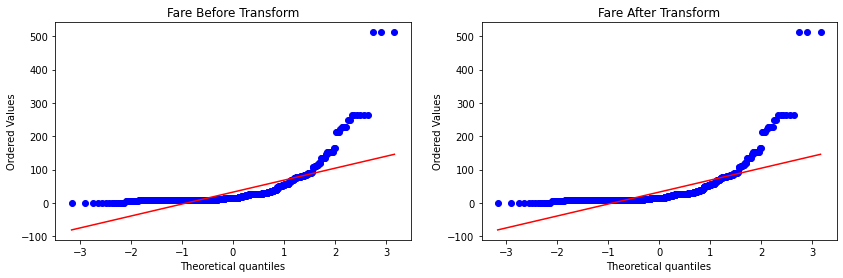

In [67]:
apply_transform(lambda x: x)    # Passing x = x (i.e no change in data) in above created function

Accuracy 0.6442446941323345


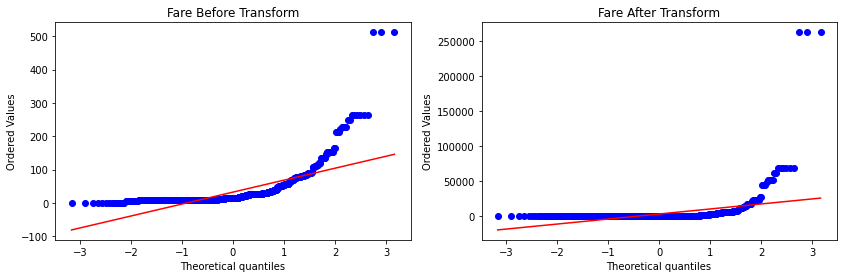

In [69]:
apply_transform(lambda x : x*x)   #square transformation

Accuracy 0.39843945068664166


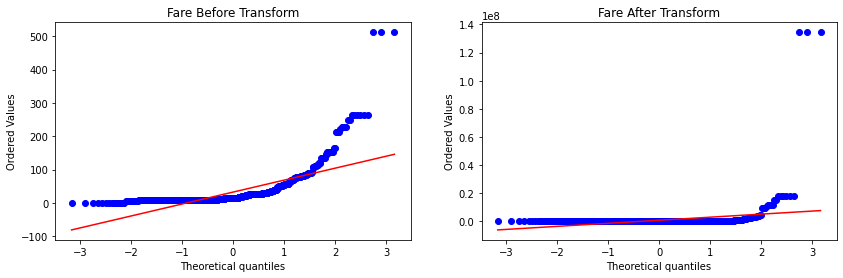

In [71]:
apply_transform(lambda x: x**3)     #cube transformation

Accuracy 0.6589013732833957


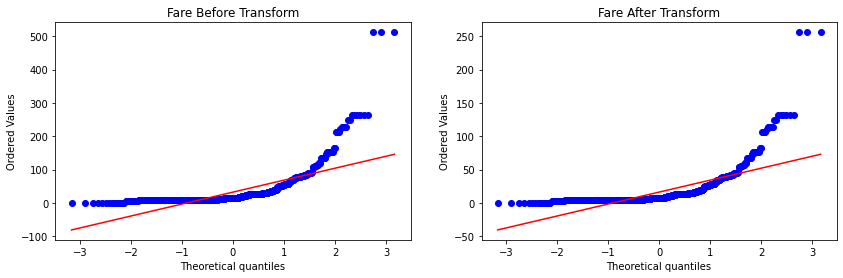

In [72]:
apply_transform(lambda x: x**1/2)     #square root transformation

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/

Accuracy nan


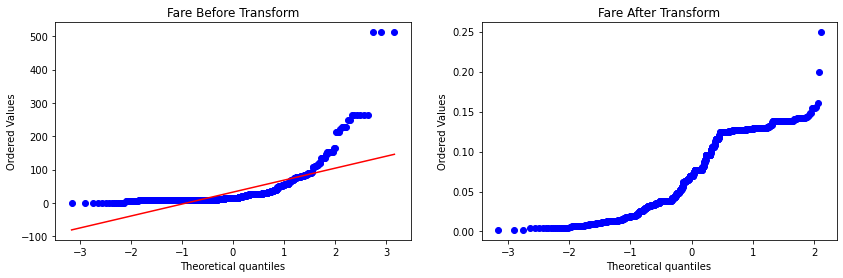

In [74]:
apply_transform(lambda x: 1/x)     #reciprocal transformation

# You will see an error here. It is possible if some value of x is zero. Hence we add +0.00001 in all the data (next cell)

Accuracy 0.61729088639201


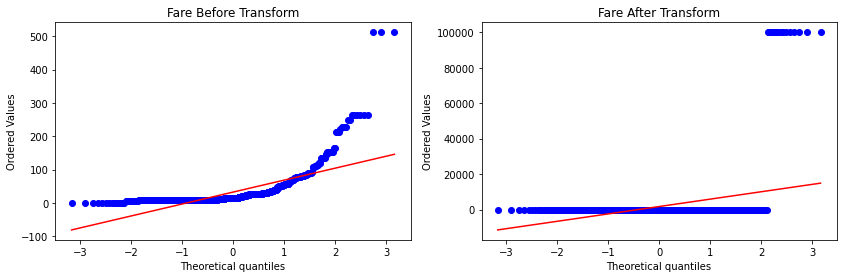

In [78]:
apply_transform(lambda x: 1/(x+0.00001))